# Домашняя задача № 1
# Катаев Денис
## Динамическое программирование
### Вариант № 5
### Задача

Условия задачи
$$ Z = c_2x_2^{2} + \sum_{j=1,3,4}c_{j}x_{j} \longrightarrow \max $$

$$ b_0=19 \\ a = (4, 1, 2, 2) \\ c = (3, 2, 3, 1.8) $$


при ограничениях:
$$ \sum_{j=1}^{4}a_{j}x_{j} \leqslant b $$ $$ x>=0 $$ $$ x_1=>2 $$ $$ x_2 \leqslant 3 $$ $$ x - целое $$

так же из задачи известно:
$$ b_{j}=b_{j-1}-a_{j}x_{j}, (j=1,2,3,4) $$

In [2]:
b0 = 19
a = [None, 4, 1, 2, 2]
c = [None, 3, 2, 3, 1.8]
xj = {0:[None, None, None, None, None]}

Шаг 1 $(b_3 \rightarrow b_4)$:


Решается аналитически
$$ f_1(b_3) = \max_{0 \leqslant x_4 \leqslant [\frac{b_3}{a_4}]} C_4 x_4 = 1.8 [\frac{b_3}{2}] $$
где $$x_4 = [\frac{b_3}{2}]$$

Шаг 2 $(b_2 \rightarrow b_3)$:

$$ f_2(b_2) = \max_{0 \leqslant x_3 \leqslant [\frac{b_2}{a_3}]}(C_3x_3 + f_1(b_3))$$
Выполним табулирование функции $f_2(b_2)$

[[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  0.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  1.8   3.   -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  3.6   4.8   6.   -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  5.4   6.6   7.8   9.   -inf  -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  7.2   8.4   9.6  10.8  12.   -inf  -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [  9.   10.2  11.4  12.6  13.8  15.   -inf  -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 10.8  12.   13.2  14.4  15.6  16.8  18.   -inf  -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf  -inf]
 [ 12.6  13.8  15.   16.2  17.4  18.6  19.8  21.   -inf

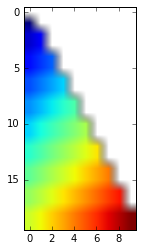

$\max f(b) = 27.0, x = array([9, 9]), b = array([18, 19]) $

In [3]:
%matplotlib inline

from __future__ import division
import numpy as np
from math import trunc
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown

def tabulate(func, restictions, max_x, max_b):
    result = np.full([max_b + 1, max_x + 1], -np.inf, dtype=float)
    it = np.nditer(result, flags=['multi_index'])
    while not it.finished:
        b, x = it.multi_index
        if 0 < b < max_b + 1 and restictions(b, x, a):
            result[b][x] = func(b, x)
        it.iternext()
    max_f = result.max()
    max_b, max_x = np.where(result == max_f)
    return result, u'$\max f(b) = %r, x = %r, b = %r $' % (max_f, max_x, max_b)

f2 = lambda b2, x3: c[3] * x3 + c[4] * trunc((b2 - a[3] * x3) / a[4])
f2_restrictions = lambda b, x, a: 0 <= x <= trunc(b / a[3])
r, md =tabulate(f2, f2_restrictions, trunc(b0 / a[3]), b0)
print r
plt.imshow(r)
plt.show()
Markdown(md)
    

Поскольку функция достигает максимума при максимальных $x$, 
то можно принять $$x_3 = [\frac{b_2}{a_3}] = [\frac{b_2}{2}]$$
тогда
$$f_2(b_2) = C_3[\frac{b_2}{a_3}] + C_4[\frac{b_3}{a_4}] =
\\ C_3[\frac{b_2}{a_3}] + C_4[\frac{b_2 - a_3 x_3}{a_4}] = 
\\ 3 [\frac{b_2}{2}] + 1.8[\frac{b_2 - [b_2]}{2}] = 3 [\frac{b_2}{2}] $$

Шаг 3 $(b_1 \rightarrow b_2)$:

$$ f_3(b_1) =\max_{0 \leqslant x_2 \leqslant [\frac{b_1}{a_2}] \leqslant 3}
    (C_2x_2^{2} + f_2(b_2)) = 
    C_2x_2^2 + C_3[\frac{b_1 - a_2 x_2}{a_3}]
$$
выполним табуляцию этой функции

[[-inf -inf -inf -inf]
 [  0.   2. -inf -inf]
 [  3.   2.   8. -inf]
 [  3.   5.   8.  18.]
 [  6.   5.  11.  18.]
 [  6.   8.  11.  21.]
 [  9.   8.  14.  21.]
 [  9.  11.  14.  24.]
 [ 12.  11.  17.  24.]
 [ 12.  14.  17.  27.]
 [ 15.  14.  20.  27.]
 [ 15.  17.  20.  30.]
 [ 18.  17.  23.  30.]
 [ 18.  20.  23.  33.]
 [ 21.  20.  26.  33.]
 [ 21.  23.  26.  36.]
 [ 24.  23.  29.  36.]
 [ 24.  26.  29.  39.]
 [ 27.  26.  32.  39.]
 [ 27.  29.  32.  42.]]


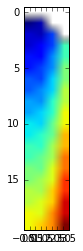

$\max f(b) = 42.0, x = array([3]), b = array([19]) $

In [4]:
f3 = lambda b1, x2: c[2] * x2 * x2 + c[3] * trunc((b1 - a[2] * x2) / a[3])
f3_restrictions = lambda b, x, a: 0 <= x <= min(3, trunc(b / a[2]))
r, md = tabulate(f3, f3_restrictions, min(3,trunc(b0 / a[2])), b0)
print r
plt.imshow(r)
plt.show()
Markdown(md)

Максимум достигается при $x_2=3$ таким образом:
$$
f_3(b_1) = C_2x_2^2 +  C_3[\frac{b_1 - a_2 x_2}{a_3}]
= 18 + 3[\frac{b_1 - 3}{2}]
$$

Шаг 4 $(b_0 \rightarrow b_1)$:

$$ f_{4}(b_{0}) =
\max_{2 \leqslant x_1 \leqslant [\frac{b_0}{a_1}]} (C_1x_1 + f_3(b_1)) = \\
C_1x_1 + C_2x_2^2 +  C_3[\frac{b_0 - a_1x_1 - a_2 x_2}{a_3}] = \\
3x_1 + 18 + 3[\frac{b_0 - 4x_1 - 3}{2}]
$$
Выполним табулирование данной функции

[[-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf  21. -inf -inf]
 [-inf -inf  21. -inf -inf]
 [-inf -inf  24. -inf -inf]
 [-inf -inf  24. -inf -inf]
 [-inf -inf  24.  24. -inf]
 [-inf -inf  27.  24. -inf]
 [-inf -inf  27.  27. -inf]
 [-inf -inf  30.  27. -inf]
 [-inf -inf  30.  27.  27.]
 [-inf -inf  33.  30.  27.]
 [-inf -inf  33.  30.  30.]
 [-inf -inf  36.  33.  30.]]


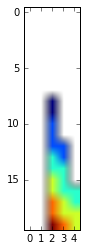

$\max f(b) = 36.0, x = array([2]), b = array([19]) $

In [5]:
f4 = lambda b0, x1: c[1] * x1 + c[2] * 3 ** 2 + c[3] * trunc((b0 - a[1] * x1 - 3) / a[3])
f4_restrictions = lambda b, x, a: 2 <= x <= trunc(b / a[1])
r, md = tabulate(f4, f4_restrictions, trunc(b0 / a[1]), b0)
print r
plt.imshow(r)
plt.show()
Markdown(md)

Максимум достигается при $x_1 = 2$ т.е
$$
f_4(b_0) = 3x_1 + 18 + 3[\frac{b_0 - 4x_1 - 3}{2}] = 3 * 2 + 18 + 3[\frac{19 - 8 - 3}{2}] = 36
$$

Выпишим результаты шагов:
1. $ f_1(b_3) = 1.8 [\frac{b_3}{2}] $, при $x_4^0 = [\frac{b_3}{2}]$
2. $ f_2(b_2) = 3 [\frac{b_2}{2}] $, при $x_3^0 = [\frac{b_2}{2}]$
3. $ f_3(b_1) = 18 + 3[\frac{b_1 - 3}{2}] $, при $x_2=3$
4. $ f_4(b_0) = 36$, при $x_1 = 2$

Выполним перерасчет результатов $b$, выполняя последовательно шаги, начиная из начального состояния $b_0 \rightarrow b_1 \rightarrow b_2 \rightarrow b_3 \rightarrow b_4$
1. $x_1^0 = 2, b_1 = b_0 - a_1x_1 = 19 - 4 * 2 = 11$
2. $x_2^0 = 3, b_2 = b_1 - a_2x_2 = 11 - 1 * 3 = 8$
3. $x_3^0 = 4, b_3 = b_2 - a_3x_3 = 8  - 2 * 4 = 0$
4. $x_4^0 = 0, b_4 = 0$
Получили оптимальной значение $x = (2,3,4,0)$ при котором значение целевой функции $Z(x^0)= 36$

In [6]:
x = [None, 2, 3, 4, 0]
f = 0
for i in  range(1,5):
    if i == 2:
        f+= c[i] * x[i] ** 2
    else:
        f+= c[i] * x[i]
print f

36.0
